# Digit recognition using MNIST dataset
### video: https://www.youtube.com/watch?v=bK_DBPcn3JQ&t=30s&ab_channel=CodeWithHarry

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
#import database
mnist=fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
#split of data and the target
X,Y= mnist['data'], mnist['target']

In [4]:
#shape of the data
print(str(X.shape)+" "+str(Y.shape))

(70000, 784) (70000,)


In [5]:
#selecting any random digit from x values and converting it into a grid of 28X28

image=X[3601]
grid=image.reshape(28,28) #it was given as 1d array of size 784 in order to minimize memory

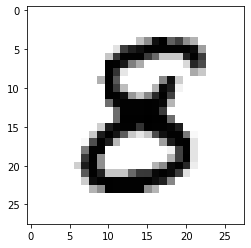

In [6]:
#display that grid as exmple
plt.imshow(grid,cmap=matplotlib.cm.binary,interpolation="nearest")

### Train Test Split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [20]:
#conversion of string data of the Y values to int values 
#(not necessary if direct string comparison is made)
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

In [21]:
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [22]:
y_test_2

array([False, False, False, ...,  True, False, False])

In [14]:
from sklearn.linear_model import LogisticRegression
#model=LogisticRegression()
model=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,tol=0.1)
model.fit(x_train,y_train_2)

C:\Users\yash gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced', max_iter=10000, tol=0.1)

### Cross validation


In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train_2,cv=3,scoring="accuracy")

C:\Users\yash gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\yash gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

array([0.95965471, 0.95855017, 0.95732566])